<table>
    <tr>
        <td><img src="./images/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Proyecto 1</p></tp>
            <tp><p style="font-size:150%;text-align:center">El mundo de los bloques</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

<b>Integrantes:</b> Luis Ángel de Ávila & Juan Andres Guevara

# Tents and Trees (Carpas y Árboles)

Planteamos nuestra adaptación del problema conocido como *El mundo de los bloques*, la cuál consiste en apilar 3 bloques de forma cúbica en una mesa de longitud igual a 3 veces la longitud de la arista de un bloque. Los bloques son apilados poniendo un único bloque encima de otro o encima de la mesa, pero no será posible apilar poniendo dos bloques (uno encima de otro) encima de un tercer bloque. El objetivo es mover los bloques desde un estado inicial hasta llegar a un estado objetivo deseado, como se muestra a continuación.

<table>
<tr>
<th><center>Estado inicial</center></th>
<th><center>Estado Objetivo</center></th>
</tr>

<tr>
<td> <img src="./images/start.png" alt="Drawing" style="width: 250px;"/></td>
<td> <img src="./images/end.png" alt="Drawing" style="width: 250px;"/></td>
</tr></table>

## Ambientes de tarea

Los ambientes de tarea que debemos atender con nuestro problema son:

- <b>Sensores:</b> Percepción de las pilas de bloques.
- <b>Acutadores:</b> Movimiento de los bloques.
- <b>Entorno:</b> Disposición de los bloques y la mesa.
- <b>Medida de Desempeño:</b> Alcanzar el estado objetivo y terminar con el menor número de movimientos posible.

## Entorno

El entorno sobre el cual desarrollaremos cuenta con las siguientes propiedades:

- Es completamente observable.
- Es de agente único.
- Es determinista.
- Es secuencial.
- Es estático.
- Es discreto.
- Es conocido.

## Definición Formal

### Estado inicial:
Una mesa con una disposición de 3 bloques.

### Posibles acciones:
Dado un estado *s*, podemos mover un bloque para apilarlo siempre y cuando esté ubicado sobre la mesa o en la cima de una pila.

### Función de transiciones:
Nuestra función de transiciones recibe un estado *s*, y retorna un estado *s+1* en donde algún bloque ha sido movido. 

### Prueba de satisfacción del objetivo:
¿La diposición de los bloques bloques sobre la mesa, coincide con el estado objetivo? 

### Función de costo:
Para el contexto de nuestro problema no es realmente necesario una función de costo, pero si tuvieramos que definir una, considerariamos que cada acción tendría el mismo costo.

## Implementación del problema

Para la implementación del problema construimos la clase *MundoBloques* en python. A continuación pondremos a prueba distintos estados iniciales y estados objetivos, midiendo su tiempo de ejecución y resolviendo el problema con distintos algoritmos de búsqueda.

[(1, 8), (0, 7)]
[(1, 7)]


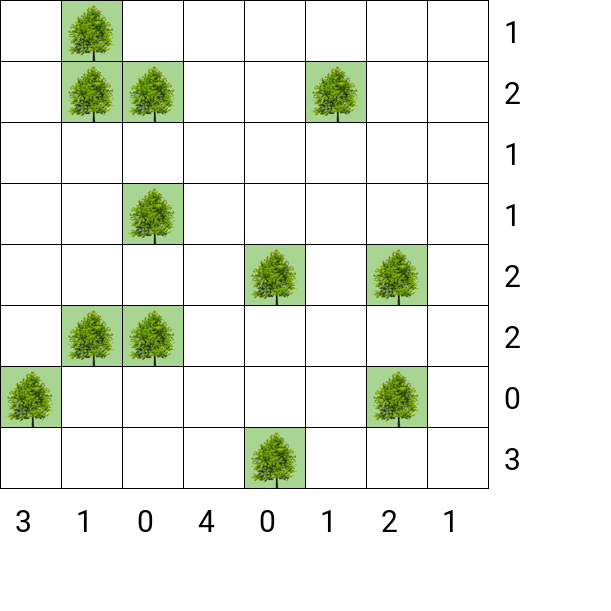

In [7]:
from TentsAndTreesPuzzleInterface.PuzzleStorage import StorePuzzle, LoadStoredPuzzle
from TentsAndTrees import TentsAndTrees,Player


matrix, row, col = LoadStoredPuzzle("Puzzles/puzzle1.npz")
puzzle = TentsAndTrees(matrix,row,col)

myplayer = Player(puzzle)

# completemoves = [(2,0,3),(3,0,3),(4,0,3),(0,3,3),(0,4,3),(0,6,3),(0,7,3)]
completemoves = [()]
for action in completemoves:
  puzzle.transition(action)

puzzle.displayState()